### Wstęp do Uczenia Maszynowego 
##### Laboratorium 14

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

#### Zbiór trzech skupień

In [3]:
## definicja zbioru z pakietu sklearn
df = make_blobs(45, 2, centers=3, random_state=1234)

## podział na X i zmiana nazw kolumn
X = pd.DataFrame(df[0])
X.columns = ["X1", "X2"]
## podział na labels i zmiana nazw kolumn
labels = pd.DataFrame(df[1])
labels.columns = ["label"]

all = pd.concat([X, labels], axis=1)

### Zadanie 0
-----
Przygotuj wizualizację powyższego zbioru danych. Do każdej obserwacji na wykresie przypisz jej numer.

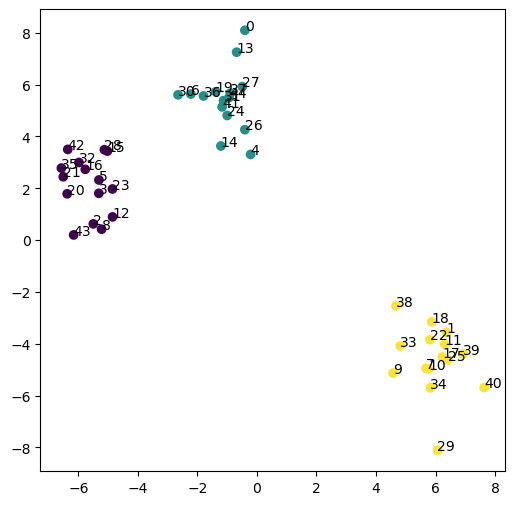

In [4]:
## wykres zbioru danych
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
ax.scatter(X.X1, X.X2, c = labels.label)

## podpisanie punktów
n = np.arange(X.shape[0])

for i, txt in enumerate(n):
    ax.annotate(txt, (X.X1[i], X.X2[i]))


### Zadanie 1 (szybka powtórka)
-------------------------------------------------------------
Przygotuj model k-średnich dla k = 2, 3. Narysuj przypisanie punktów do skupień. Zaznacz centroidy.

In [5]:
kmeans2 = KMeans(n_clusters=2)
kmeans3 = KMeans(n_clusters=3)

In [6]:
kmeans2.fit(X)
kmeans3.fit(X)

KMeans(n_clusters=3)

Text(0.5, 1.0, 'k-średnich, k = 3')

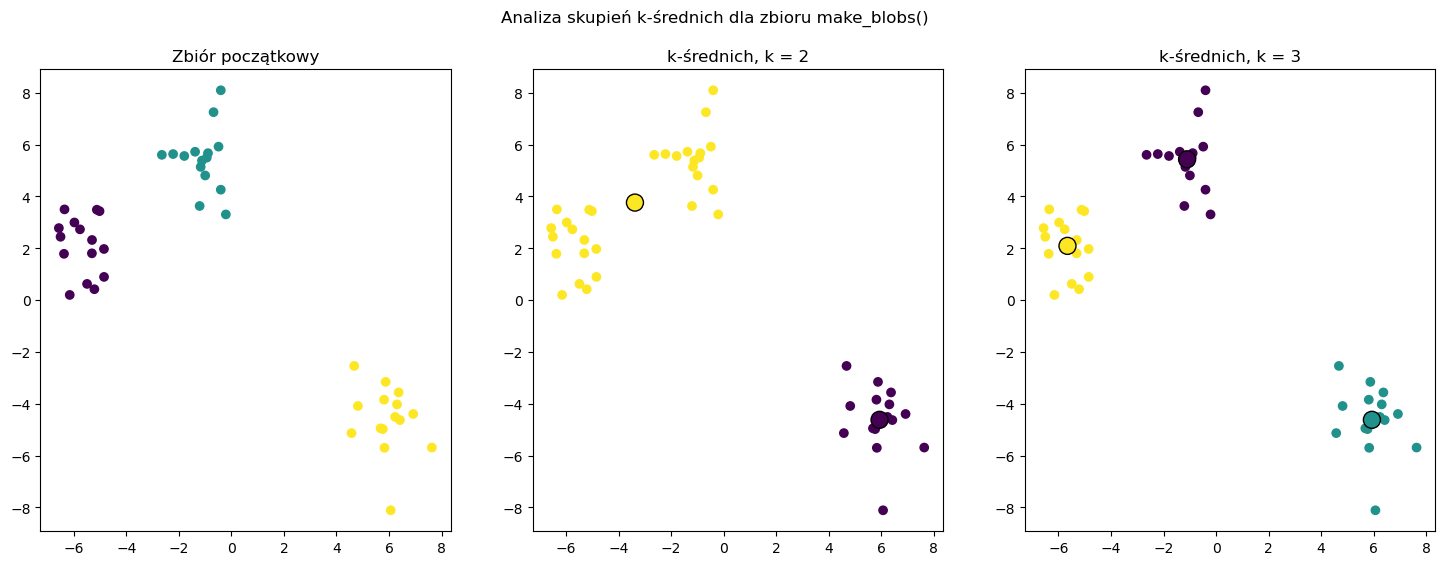

In [7]:
## wizualizacja wyników
fig, axs = plt.subplots(1,3)
fig.set_size_inches(18,6)
fig.suptitle('Analiza skupień k-średnich dla zbioru make_blobs()')
axs[0].scatter(X.X1, X.X2, c = labels.label)
axs[0].set_title("Zbiór początkowy")
axs[1].scatter(X.X1, X.X2, c = kmeans2.labels_)
axs[1].scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c = np.unique(kmeans2.labels_), edgecolors="black", s=150)
axs[1].set_title("k-średnich, k = 2")
axs[2].scatter(X.X1, X.X2, c = kmeans3.labels_)
axs[2].scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], c = np.unique(kmeans3.labels_), edgecolors="black", s=150)
axs[2].set_title("k-średnich, k = 3")

### Metody hierarchiczne


###### https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

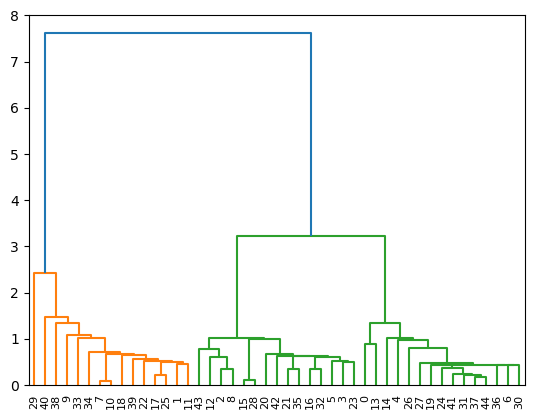

In [8]:
##
from scipy.cluster import hierarchy
Z = hierarchy.linkage(X, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z)

In [9]:
AgCl_single = AgglomerativeClustering(linkage="single", n_clusters=3).fit(X)
AgCl_complete = AgglomerativeClustering(linkage="complete", n_clusters=3).fit(X)

Text(0.5, 1.0, 'k = 3, complete')

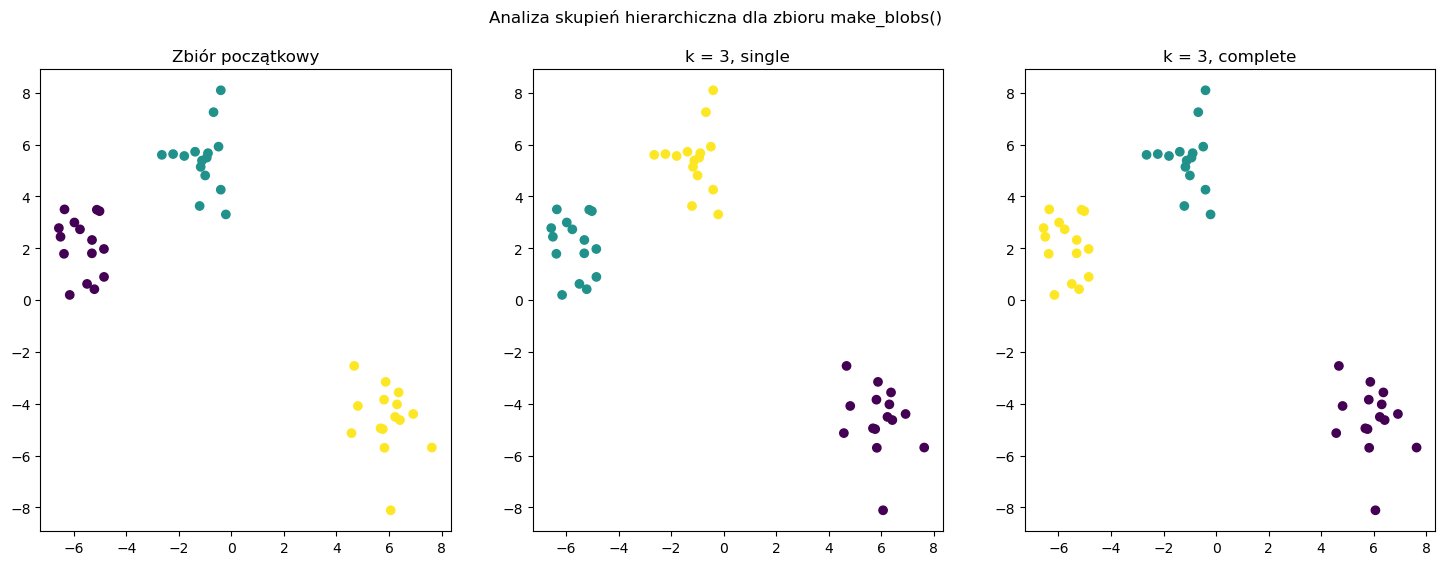

In [10]:
## wizualizacja wyników
fig, axs = plt.subplots(1,3)
fig.set_size_inches(18,6)
fig.suptitle('Analiza skupień hierarchiczna dla zbioru make_blobs()')

axs[0].scatter(X.X1, X.X2, c = labels.label)
axs[0].set_title("Zbiór początkowy")
axs[1].scatter(X.X1, X.X2, c = AgCl_single.labels_)
axs[1].set_title("k = 3, single")
axs[2].scatter(X.X1, X.X2, c = AgCl_complete.labels_)
axs[2].set_title("k = 3, complete")

### Zadanie 2
---
Zbiór danych s1.csv zawiera pewne sztucznie wygenerowane dwuwymiarowe dane.

a) Zwizualizuj dane.

b) Dopasuj metodę k-średnich. Zaproponuj liczbę klastrów.

c) Dopasuj metodę klasteryzacji hierarchicznej z funkcją łączącą *single* i *complete*.

d) Określ optymalną liczbę klastrów. Zwizualizuj dokonany podział na klastry. Która metoda daje lepsze rezultaty?

In [11]:
df = pd.read_csv("s1.csv")

In [12]:
df.columns = ["X1", "X2"]
df

,X1,X2
0,665845,557965
1,597173,575538
2,618600,551446
3,635690,608046
4,588100,557588
...,...,...
4994,665426,853940
4995,691827,863963
4996,650661,861267
4997,599647,858702


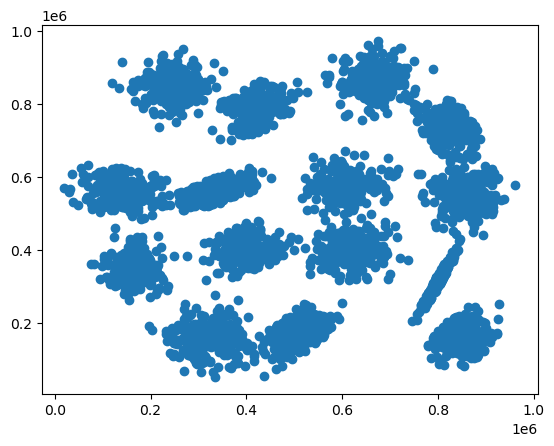

In [13]:
# a)
plt.scatter(x = df.X1, y = df.X2)

In [14]:
# b)
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
   }

sse = []

for k in range(8, 20):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

Text(0, 0.5, 'SSE')

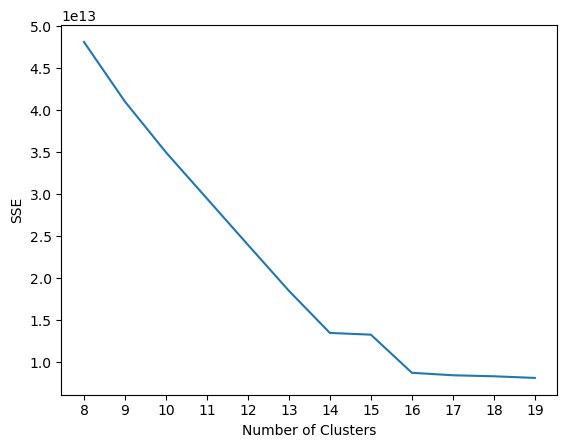

In [15]:
plt.plot(range(8, 20),sse)
plt.xticks(range(8, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")

In [16]:
# Warto rozważyć 14 lub 15 klastrów.

kmeans = KMeans(n_clusters=15, n_init=10).fit(df)

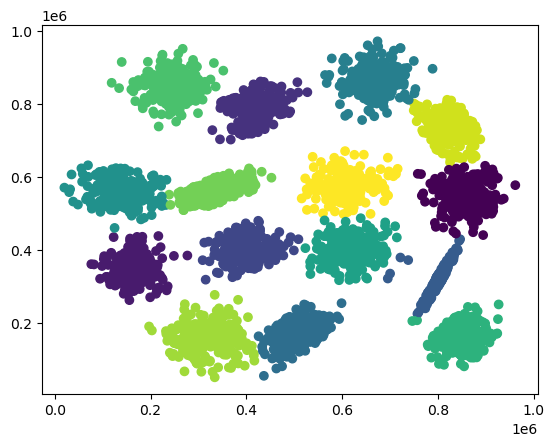

In [17]:
plt.scatter(x = df.X1, y = df.X2, c = kmeans.labels_)

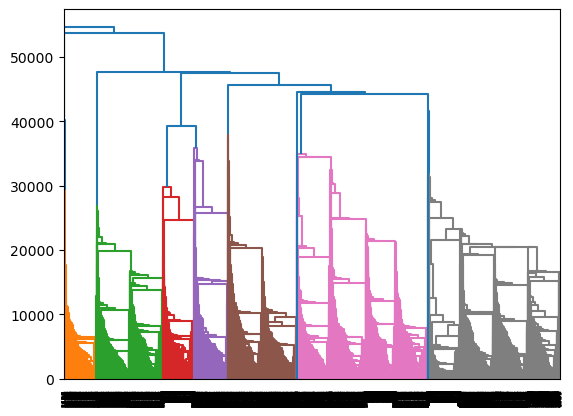

In [18]:
# c) i d)

# pełny dendogram - single
from scipy.cluster import hierarchy
Z = hierarchy.linkage(df, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z)


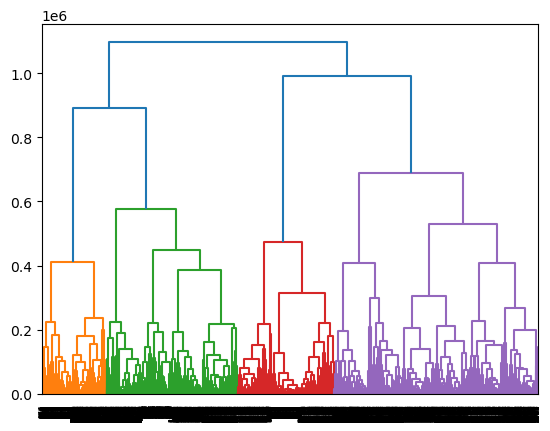

In [19]:
# pełny dendogram - comlete
from scipy.cluster import hierarchy
Z = hierarchy.linkage(df, 'complete')
plt.figure()
dn = hierarchy.dendrogram(Z)

In [20]:
#
AgCl_single = AgglomerativeClustering(linkage="single", n_clusters=15).fit(df)
AgCl_complete = AgglomerativeClustering(linkage="complete", n_clusters=15).fit(df)


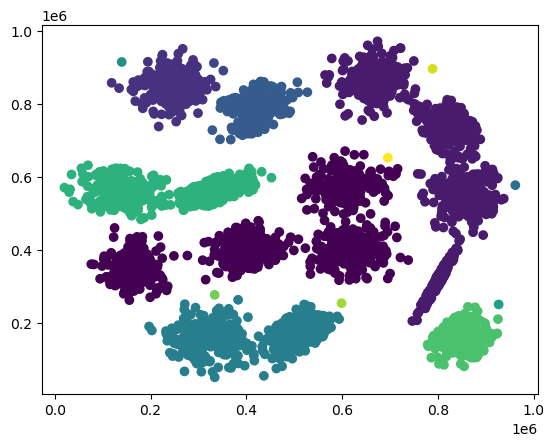

In [21]:
plt.scatter(x = df.X1, y = df.X2, c = AgCl_single.labels_)

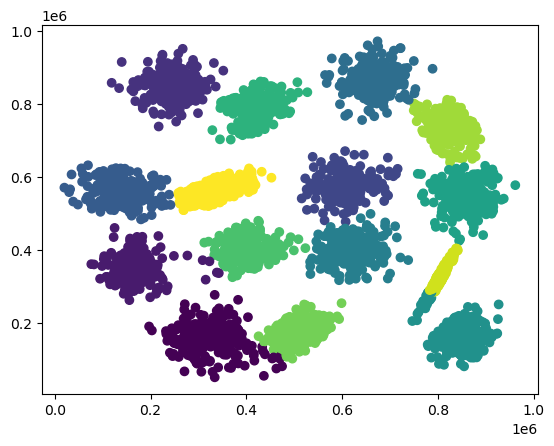

In [22]:
plt.scatter(x = df.X1, y = df.X2, c = AgCl_complete.labels_)

## DBSCAN

In [23]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

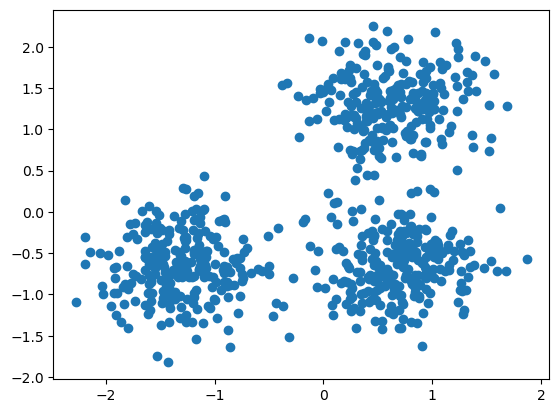

In [24]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])

In [25]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


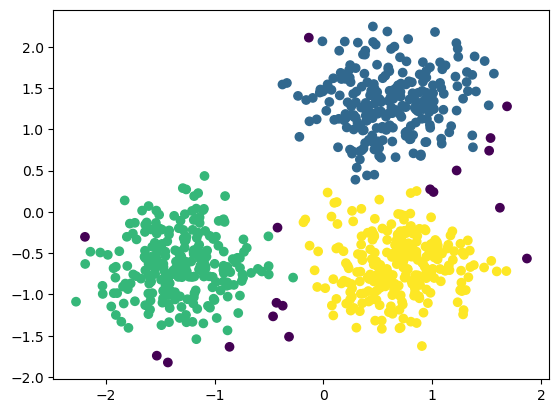

In [26]:
plt.scatter(X[:, 0], X[:, 1], c = db.labels_)

### Zadanie 3
---
Zbiór danych jain.csv zawiera dwuwymiarowe dane.

a) Zwizualizuj dane.

b) Użyj algorytmu k-średnich z liczbą klastrów równą 2. Zwizualizuj dokonany podział na klastry.
Czy metoda dobrze działa? Porównaj uzyskane wyniki z prawdziwymi wartościami klastrów.

b*) Użyj algorytmu hierarchicznego analizy skupień z linkage single oraz complete.

c) Powtórz wcześniejszy podpunkt dla algorytmu DBSCAN. Która metoda daje najbardziej
zbliżony do rzeczywistego podział na klastry?


In [27]:
jain = pd.read_csv("jain.csv")

In [28]:
jain.columns = ["X1", "X2", "Y"]

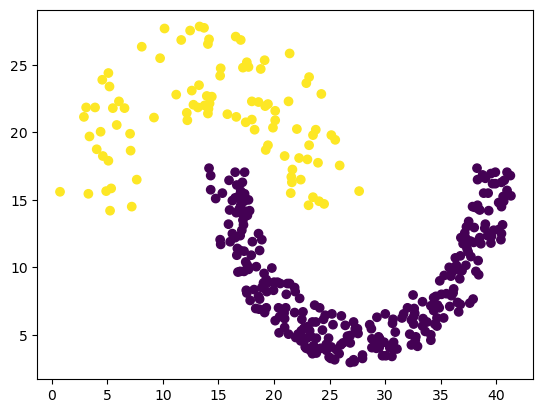

In [29]:
# a)
plt.scatter(x = jain.X1, y = jain.X2, c = jain.Y)

In [30]:
# b), b*), c), d)
# k-średnich
kmeans = KMeans(n_clusters=2, n_init=10).fit(jain)

# hierarchiczny 'single'
single = AgglomerativeClustering(linkage="single", n_clusters=2).fit(jain)

# hierarchiczny 'complete'
complete = AgglomerativeClustering(linkage="complete", n_clusters=2).fit(jain)

# dbscan
db = DBSCAN(eps=2.5, min_samples=15).fit(jain)

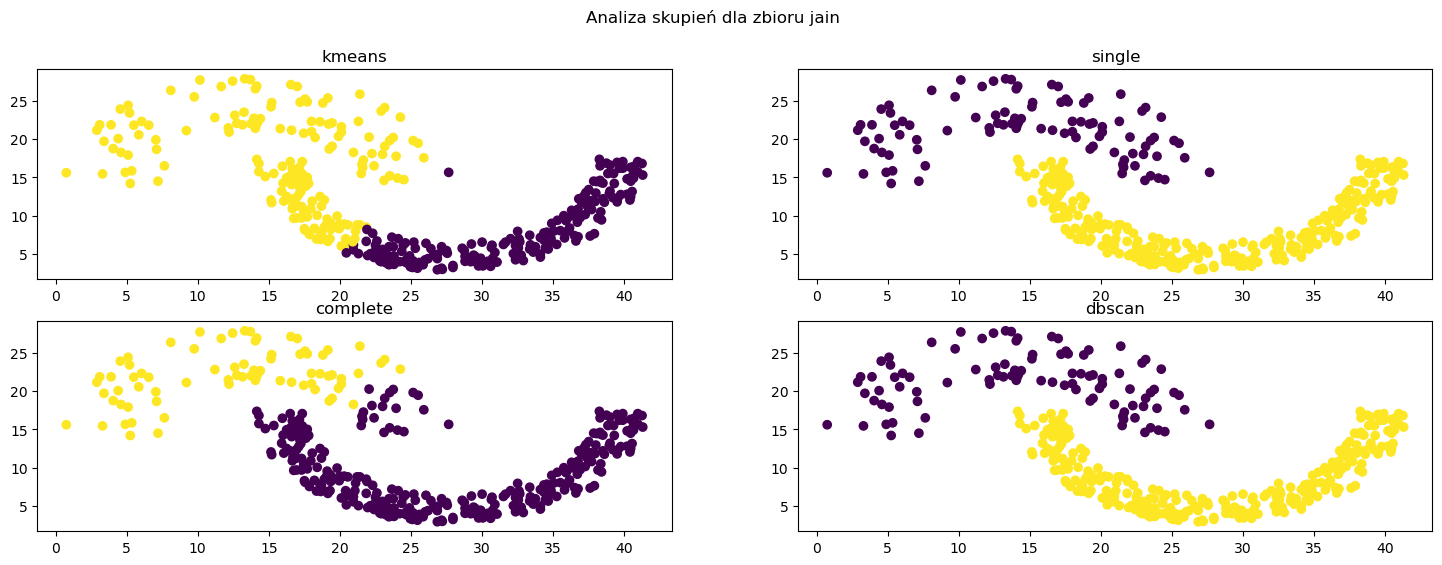

In [31]:
## wizualizacja wyników
fig, axs = plt.subplots(2,2)
fig.set_size_inches(18,6)
fig.suptitle('Analiza skupień dla zbioru jain')

labels = [kmeans.labels_, single.labels_, complete.labels_, db.labels_]
title = ["kmeans", "single",  "complete", "dbscan"]


for i, ax in enumerate(axs.flatten()):
    ax.scatter(x=jain.X1, y=jain.X2, c = labels[i])
    ax.set_title(title[i])
    
